# Problem Statement

Given a set of descriptive features about a car crash in Chicago, IL(data.gov), can I predict the most severe injury from the crash?

# Models Used


# Evaluation Criterion


In [3]:
# Import a few necessary libraries to get started
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's create a data frame from our .csv file and take a look at the head to see what our data look like

In [5]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Import data file and create pandas data frame
df = pd.read_csv('../data/traffic_crashes_chicago.csv')
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",08/18/2023 12:55:00 PM,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,700,W,OHARE ST,1654.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",07/29/2023 02:45:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",2101,S,ASHLAND AVE,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"$501 - $1,500",08/18/2023 06:01:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,3422,N,LONG AVE,1633.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,NaN,CURVE ON GRADE,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",11/26/2019 08:38:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,5,W,TERMINAL ST,1655.0,Y,Y,NaN,NaN,NaN,NaN,2,FATAL,1.0,1.0,0.0,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",08/18/2023 10:48:00 AM,FOLLOWING TOO CLOSELY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,3,W,TERMINAL ST,1653.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


Everything seems to have loaded in fine, so now I will dig in a little deeper on the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902759 entries, 0 to 902758
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                902759 non-null  object 
 1   CRASH_DATE_EST_I               66646 non-null   object 
 2   CRASH_DATE                     902759 non-null  object 
 3   POSTED_SPEED_LIMIT             902759 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         902759 non-null  object 
 5   DEVICE_CONDITION               902759 non-null  object 
 6   WEATHER_CONDITION              902759 non-null  object 
 7   LIGHTING_CONDITION             902759 non-null  object 
 8   FIRST_CRASH_TYPE               902759 non-null  object 
 9   TRAFFICWAY_TYPE                902759 non-null  object 
 10  LANE_CNT                       199022 non-null  float64
 11  ALIGNMENT                      902759 non-null  object 
 12  ROADWAY_SURFACE_COND          

There are just over 900,000 entries. I see a few columns with very low non-null values that may need to be removed.


Also, based on some of the values, from the df.head() I see some columns that don't seem to add any value and those will need to be removed later as well.



But first I will check column headers for any potential issues in formatting

In [9]:
# Show all column names
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

Everything looks good. Let's now look at missing values totals and percentages for each column

In [11]:
def missing_values_table(df):
    # Calculate missing value counts and percentages
    missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing Values': df.isnull().sum(),
        'Percentage Missing': df.isnull().mean() * 100
    })
    
    # Reset the index for a cleaner look
    missing_data = missing_data.reset_index(drop=True)
    
    # Display the result
    print(missing_data)

missing_values_table(df)

                           Column  Missing Values  Percentage Missing
0                 CRASH_RECORD_ID               0            0.000000
1                CRASH_DATE_EST_I          836113           92.617520
2                      CRASH_DATE               0            0.000000
3              POSTED_SPEED_LIMIT               0            0.000000
4          TRAFFIC_CONTROL_DEVICE               0            0.000000
5                DEVICE_CONDITION               0            0.000000
6               WEATHER_CONDITION               0            0.000000
7              LIGHTING_CONDITION               0            0.000000
8                FIRST_CRASH_TYPE               0            0.000000
9                 TRAFFICWAY_TYPE               0            0.000000
10                       LANE_CNT          703737           77.954028
11                      ALIGNMENT               0            0.000000
12           ROADWAY_SURFACE_COND               0            0.000000
13                  

At this point, I will tidy up the data frame a bit by removing some columns will a large percentage of missing values as well as some columns that I don't think we need. 


Below is my reasoning for removing each column. There may be some columns that get dropped later as well, but this is just a preliminary drop.


Also, once my end data frame is set, I will include a justification on each column that I kept.



DESCRIPTIVE FEATURES REMOVED WITH REASONING:


'CRASH_RECORD_ID': Index-like feature. Not adding value


'CRASH_DATE_EST_I': Over 90% missing values


'CRASH_DATE': Date information is included elsewhere in data frame in a more useable format


'REPORT_TYPE': Does not seem to have any bearing on the outcome of the crash


'NOT_RIGHT_OF_WAY_I': Over 95% missing values


'DATE_POLICE_NOTIFIED': Does not seem to have any bearing on the outcome of the crash


'STREET_NAME': If we decide to use this feature, we can capture it in the 'STREET_NUMBER' feature


'PHOTOS_TAKEN_I': Over 95% missing values


'STATEMENTS_TAKEN_I': Over 95% missing values


'DOORING_I': Over 95% missing values


'WORK_ZONE_I': Over 95% missing values


'WORK_ZONE_TYPE': Over 95% missing values


'WORKERS_PRESENT_I': Over 95% missing values


'NUM_UNITS': Does not seem to have any bearing on the outcome of the crash


'LOCATION': If we decide to use this feature, we can capture it in the 'BEAT_OF_OCCURRENCE' or 'STREET_NO' feature


'LATITUDE': If we decide to use this feature, we can capture it in the 'BEAT_OF_OCCURRENCE' or 'STREET_NO' feature


'LONGITUDE': If we decide to use this feature, we can capture it in the 'BEAT_OF_OCCURRENCE' or 'STREET_NO' feature


'INJURIES_UNKNOWN': Expansion of the target feature


'INJURIES_NO_INDICATION': Expansion of the target feature


'INJURIES_REPORTED_NOT_EVIDENT': Expansion of the target feature


'INJURIES_NON_INCAPACITATING': Expansion of the target feature


'INJURIES_INCAPACITATING': Expansion of the target feature


'INJURIES_FATAL': Expansion of the target feature


'INJURIES_TOTAL': Expansion of the target feature


'CRASH_TYPE': Includes target feature information


'LANE_CNT': Over 75% missing values


'INTERSECTION_RELATED_I': Over 75% missing values


DESCRIPTIVE FEATURES REMOVED THAT MAY BE ADDED BACK LATER WITH REASONING:




'STREET_NO'


'BEAT_OF_OCCURRENCE'



There are a few reasons I have temporarily dropped these columns from the data frame


First, I want to see models with only categorical features and these have high cardinality. I may add them back later for location information by grouping them into categories.


Second, I want to see a model that is independent of location to see how it performs


Third, These two features would be providing similar information so I would only need one of them


'STREET_NO'


'BEAT_OF_OCCURRENCE'


In [13]:
# Make a list of columns to drop from Data Frame
# Rationale for dropping of columns in markdown above
columns_to_drop = ['CRASH_RECORD_ID', 'CRASH_DATE_EST_I','CRASH_DATE', 'REPORT_TYPE', 'NOT_RIGHT_OF_WAY_I',
                   'DATE_POLICE_NOTIFIED', 'STREET_NAME','PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 
                   'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS','LATITUDE', 'LONGITUDE',
                   'LOCATION', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'INJURIES_UNKNOWN', 'INJURIES_NO_INDICATION',
                   'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NON_INCAPACITATING', 'INJURIES_INCAPACITATING',
                   'INJURIES_FATAL', 'INJURIES_TOTAL', 'CRASH_TYPE', 'LANE_CNT', 'INTERSECTION_RELATED_I',
                   ]
# Drop columns from Data Frame
df = df.drop(columns_to_drop, axis=1)

In [14]:
# Change all values to string
df = df.astype('string')

Now lets look at some descriptive statistics for our features

In [16]:
# Basic statistics of features
print("\nDescriptive Statistics:")
df.describe().T


Descriptive Statistics:


,count,unique,top,freq
POSTED_SPEED_LIMIT,902759,46,30,665023
TRAFFIC_CONTROL_DEVICE,902759,19,NO CONTROLS,510974
DEVICE_CONDITION,902759,8,NO CONTROLS,517026
WEATHER_CONDITION,902759,12,CLEAR,709998
LIGHTING_CONDITION,902759,6,DAYLIGHT,579098
FIRST_CRASH_TYPE,902759,18,PARKED MOTOR VEHICLE,208926
TRAFFICWAY_TYPE,902759,20,NOT DIVIDED,388754
ALIGNMENT,902759,6,STRAIGHT AND LEVEL,881379
ROADWAY_SURFACE_COND,902759,7,DRY,667884
ROAD_DEFECT,902759,7,NO DEFECTS,718889


Some of these features seem to have a pretty high number of categories. 


Let's dig a little deeper and take a look at the value counts for each feature

In [18]:
for column in df.columns:
    print(df[column].value_counts(), "\n")

POSTED_SPEED_LIMIT
30    665023
35     59697
25     57886
20     37764
15     32163
10     21121
40      8635
0       7588
45      5964
5       4960
55       884
50       276
3        221
9         96
39        95
99        66
60        53
1         41
24        38
2         31
65        20
32        20
34        16
33        14
11        11
26        11
36         8
6          7
70         7
7          6
18         4
12         4
22         4
14         4
29         3
23         3
31         2
8          2
38         2
16         2
4          2
62         1
63         1
44         1
49         1
46         1
Name: count, dtype: Int64 

TRAFFIC_CONTROL_DEVICE
NO CONTROLS                 510974
TRAFFIC SIGNAL              250268
STOP SIGN/FLASHER            89487
UNKNOWN                      38422
OTHER                         6103
YIELD                         1368
LANE USE MARKING              1226
OTHER REG. SIGN               1104
OTHER WARNING SIGN             716
PEDESTRIAN CROSSI

Looking at the value counts for these features, the four that jump out to me are:

'POSTED_SPEED_LIMIT': High cardinality. Also, posted speed limits tend to end in '5' or '0' but I see a large number of other values

'PRIM_CONTRIBUTORY_CAUSE': High cardinality

'SEC_CONTRIBUTORY_CAUSE': High cardinality

'HIT_AND_RUN_I': Large percentage of missing values

According to the Illinois Department of Transportation,
POLICY ON ESTABLISHING AND POSTING SPEED LIMITS ON THE
STATE HIGHWAY SYSTEM
ILLINOIS DEPARTMENT OF TRANSPORTATION – BUREAU OF OPERATIONS
APPLICATION OF POLICY TO CITIES, COUNTIES AND OTHER LOCAL AGENCIES
https://safety.fhwa.dot.gov/speedmgt/ref_mats/fhwasa1304/resources2/22%20-%20Policy%20on%20Establishing%20and%20Posting%20Speed%20Limits%20on%20the%20State%20Highway%20System.pdf

There are set speed limits that always end in increments of 5. 

I will remove instances not ending in increments of '5' as well as instances where the posted speed limit is '0' as that seems to not be a valid speed limit.

For the Primary and Secondary Contributory causes, while the cardinality is high, it seems that these are vital information for the model. 

Therefore, I will not make any changes at this point.

For 'HIT_AND_RUN_I': This one was very interesting to me. I don't have a subject matter expert on hand to ask about this number, but when I initially looked at the distribution of Yes versus No on hit and runs I wondered if it were possible that the Yes values were valid in that police only reported 'Yes' values of hit and run and otherwise, generally left the category blank. So I did some internet sleuthing to find out in general what percentages of all crashes are hit and runs in the US. It was fairly difficult to find exact data for this, but every value I found was far below the ~23% that we see in this data. It was much easier to locate percentages of fatalities that were hit and runs. Those values tended to be either below or in range of the ~23% value that we see in our data. Therefore, I am going to go with the assumption that the 'Yes' values on 'HIT_AND_RUN_I' are valid and impute all null values with a 'No' value.


In [20]:
# Filter the DataFrame to keep only rows where POSTED_SPEED_LIMIT ends in '5' or '0'
df = df[df['POSTED_SPEED_LIMIT'].astype(str).str.endswith(('5', '0'))]

# Filter the DataFrame to keep only rows where POSTED_SPEED_LIMIT ends in '5' or '0', but exclude the value '0'
df['POSTED_SPEED_LIMIT'] = df['POSTED_SPEED_LIMIT'].astype(str)
df = df[
    df['POSTED_SPEED_LIMIT'].astype(str).str.endswith(('5', '0')) & 
    (df['POSTED_SPEED_LIMIT'].astype(str) != '0')
]

# Reset the index
df = df.reset_index(drop=True)

# Print value counts to check
print(df['POSTED_SPEED_LIMIT'].value_counts())


POSTED_SPEED_LIMIT
30    665023
35     59697
25     57886
20     37764
15     32163
10     21121
40      8635
45      5964
5       4960
55       884
50       276
60        53
65        20
70         7
Name: count, dtype: int64


In [21]:
# Replace null values in 'HIT_AND_RUN_I' with 'N'
df['HIT_AND_RUN_I'] = df['HIT_AND_RUN_I'].fillna('N')

# Print value counts to check
print(df['HIT_AND_RUN_I'].value_counts())

HIT_AND_RUN_I
N    625988
Y    268465
Name: count, dtype: Int64


Let's see what our missing values percentages and descriptive statistics look like now.

In [23]:
# Print missing value percentages
missing_values_table(df)

# Basic statistics of features
print("\nDescriptive Statistics:")
df.describe().T

                     Column  Missing Values  Percentage Missing
0        POSTED_SPEED_LIMIT               0            0.000000
1    TRAFFIC_CONTROL_DEVICE               0            0.000000
2          DEVICE_CONDITION               0            0.000000
3         WEATHER_CONDITION               0            0.000000
4        LIGHTING_CONDITION               0            0.000000
5          FIRST_CRASH_TYPE               0            0.000000
6           TRAFFICWAY_TYPE               0            0.000000
7                 ALIGNMENT               0            0.000000
8      ROADWAY_SURFACE_COND               0            0.000000
9               ROAD_DEFECT               0            0.000000
10            HIT_AND_RUN_I               0            0.000000
11                   DAMAGE               0            0.000000
12  PRIM_CONTRIBUTORY_CAUSE               0            0.000000
13   SEC_CONTRIBUTORY_CAUSE               0            0.000000
14         STREET_DIRECTION             

,count,unique,top,freq
POSTED_SPEED_LIMIT,894453,14,30,665023
TRAFFIC_CONTROL_DEVICE,894453,19,NO CONTROLS,504861
DEVICE_CONDITION,894453,8,NO CONTROLS,510949
WEATHER_CONDITION,894453,12,CLEAR,703530
LIGHTING_CONDITION,894453,6,DAYLIGHT,573321
FIRST_CRASH_TYPE,894453,18,PARKED MOTOR VEHICLE,205847
TRAFFICWAY_TYPE,894453,20,NOT DIVIDED,387105
ALIGNMENT,894453,6,STRAIGHT AND LEVEL,873295
ROADWAY_SURFACE_COND,894453,7,DRY,661887
ROAD_DEFECT,894453,7,NO DEFECTS,712236


There are only two categories remaining that have any missing values.

Since the total percentage missing is under 1/4 of a percentage of the entire dataset, I am just going to delete any remaining instances that have missing values.

In [25]:
# Drop all rows with null values
df = df.dropna()

# Reset the index after dropping rows
df = df.reset_index(drop=True)

# Verify the changes
print(df.info())  # Check for nulls and the new shape of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892492 entries, 0 to 892491
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   POSTED_SPEED_LIMIT       892492 non-null  object
 1   TRAFFIC_CONTROL_DEVICE   892492 non-null  string
 2   DEVICE_CONDITION         892492 non-null  string
 3   WEATHER_CONDITION        892492 non-null  string
 4   LIGHTING_CONDITION       892492 non-null  string
 5   FIRST_CRASH_TYPE         892492 non-null  string
 6   TRAFFICWAY_TYPE          892492 non-null  string
 7   ALIGNMENT                892492 non-null  string
 8   ROADWAY_SURFACE_COND     892492 non-null  string
 9   ROAD_DEFECT              892492 non-null  string
 10  HIT_AND_RUN_I            892492 non-null  string
 11  DAMAGE                   892492 non-null  string
 12  PRIM_CONTRIBUTORY_CAUSE  892492 non-null  string
 13  SEC_CONTRIBUTORY_CAUSE   892492 non-null  string
 14  STREET_DIRECTION    

Everything looks good! Now I will take a look at bar graphs of each of the features

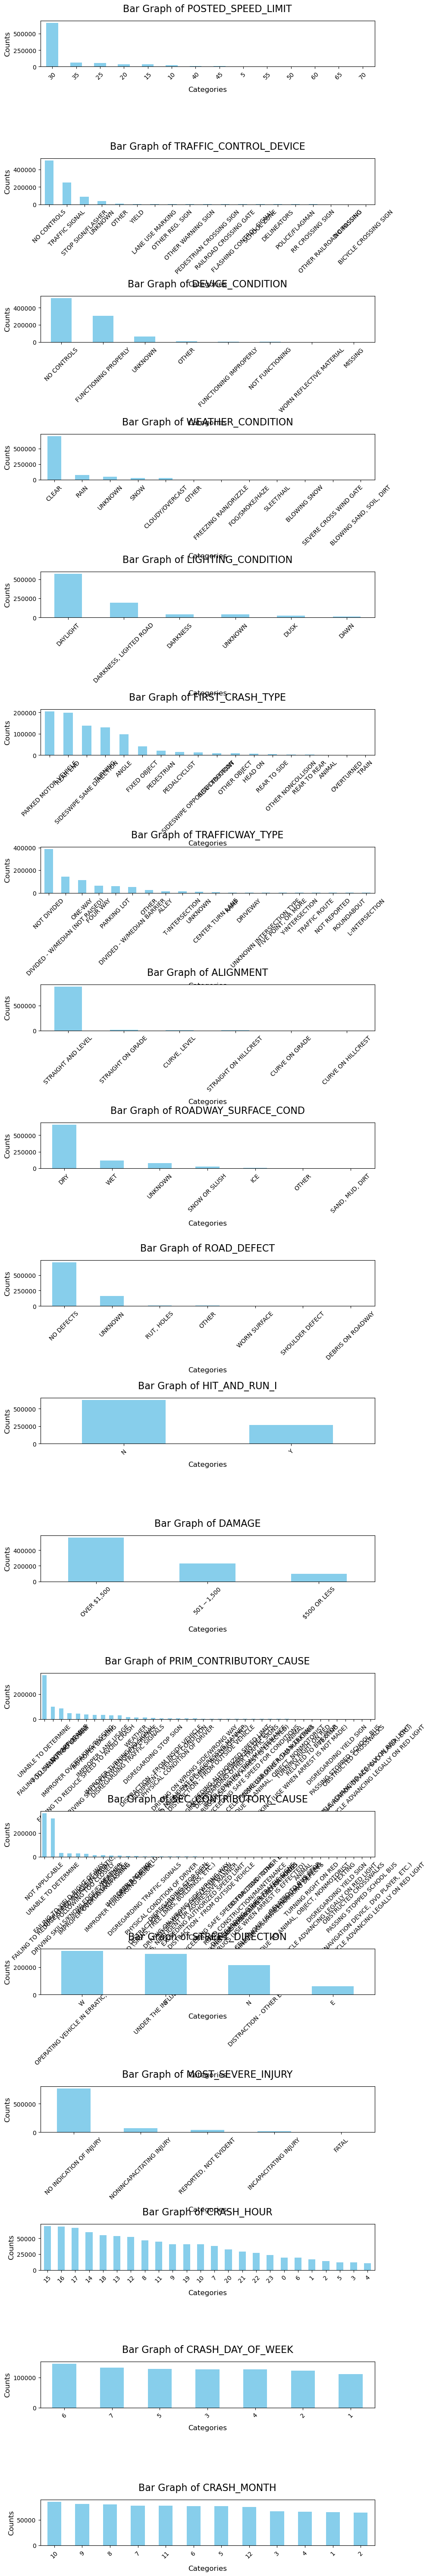

In [27]:
# Select all categorical columns
categorical_columns = df.select_dtypes(include=['string', 'object']).columns

# Set up the figure
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, len(categorical_columns) * 4))

# Plot each categorical column
for i, column in enumerate(categorical_columns):
    ax = axes[i] if len(categorical_columns) > 1 else axes  # Handle single-column case
    df[column].value_counts().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Bar Graph of {column}', fontsize=16, pad=15)  # Add padding to the title
    ax.set_xlabel('Categories', fontsize=12, labelpad=10)  # Add padding to the x-axis label
    ax.set_ylabel('Counts', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
fig.subplots_adjust(hspace=2.0)  # Increase the height between plots

# Display the plots
plt.show()


The largest thing to note here is the unbalanced nature of my target feature 'MOST_SEVERE_INJURY'.

Random Forest

XGBoost

SVM

stratified sampling

k-fold sampling

Over-sampling/Under-sampling

Deep Learning model(almost 1 million instances)


In [29]:
# Define the file path relative to the notebook
file_path = '../saves/data/cleaned_data.csv'

# Save the DataFrame to the specified path
df.to_csv(file_path, index=False)

# Confirm the save
print(f"DataFrame saved to '{file_path}'")

DataFrame saved to '../saves/data/cleaned_data.csv'


As we prepare to encode our features, I will identify which categories are nominal categorical vs. ordinal categorical features.

Here is a reminder of our data.

In [31]:
# Separate target feature(y) and descriptive features(X)
y = df['MOST_SEVERE_INJURY']
X = df.drop(['MOST_SEVERE_INJURY'], axis=1)

# Identify types of categorical features and their constituent features so that we can properly encode them later
ordinal_cat = ['POSTED_SPEED_LIMIT', 'DAMAGE',] # Ordinal encoding
cyclic_cat = ['CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'] # sin/cos cyclic encoding
nominal_cat = ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', # one-hot encoding
              'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
              'HIT_AND_RUN_I', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION']
columns = cyclic_cat + nominal_cat

In [32]:
sl_cats = ['5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70']
dam_cats = ['$500 OR LESS', '$501 - $1,500', 'OVER $1,500']


"""
Try the following models:

Random Forest - no cyclic encoding of date features. ordinal instead

XGBoost - no cyclic encoding of date features. ordinal instead

SVM - cyclic encoding of date featues

Naive Bayes Classification - cyclic encoding of date featues

Decision Tree - no cyclic encoding of date features. ordinal instead

kNN
"""

In [34]:
df

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,N,"OVER $1,500",FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,W,NONINCAPACITATING INJURY,12,6,8
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,Y,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",S,NO INDICATION OF INJURY,14,7,7
2,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,N,"$501 - $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,N,NONINCAPACITATING INJURY,17,6,8
3,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,CURVE ON GRADE,DRY,NO DEFECTS,N,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,W,FATAL,8,3,11
4,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,N,"OVER $1,500",FOLLOWING TOO CLOSELY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,W,NO INDICATION OF INJURY,10,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892487,30,UNKNOWN,UNKNOWN,UNKNOWN,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,N,$500 OR LESS,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,N,INCAPACITATING INJURY,16,6,6
892488,30,LANE USE MARKING,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE OPPOSITE DIRECTION,CENTER TURN LANE,STRAIGHT AND LEVEL,DRY,NO DEFECTS,N,"OVER $1,500",IMPROPER LANE USAGE,DISTRACTION - FROM INSIDE VEHICLE,W,NO INDICATION OF INJURY,3,3,10
892489,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,N,"OVER $1,500",IMPROPER OVERTAKING/PASSING,UNABLE TO DETERMINE,S,NO INDICATION OF INJURY,16,2,6
892490,30,UNKNOWN,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,N,"OVER $1,500",IMPROPER OVERTAKING/PASSING,UNABLE TO DETERMINE,W,NO INDICATION OF INJURY,14,3,7


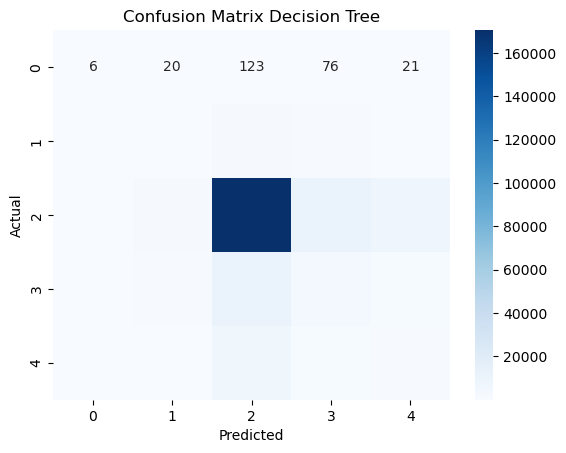

Decision Tree:
 Accuracy: 0.7876, Precision: 0.7916,     Recall: 0.7876, F1 Score: 0.7896



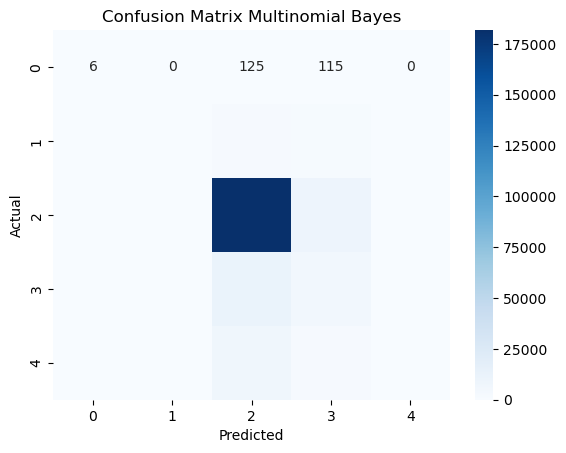

Multinomial Bayes:
 Accuracy: 0.8426, Precision: 0.8038,     Recall: 0.8426, F1 Score: 0.8183



In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# Encode the target label
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Create sin/cos transformer functions for cyclical time based encoding of categorical data
def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

#https://scikit-learn.org/1.5/auto_examples/applications/plot_cyclical_feature_engineering.html
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', drop='first')


# Create preprocessor for models that DO NOT need cyclic encoding of time based features
non_cyclic_preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", one_hot_encoder, columns),
        ("ord1", OrdinalEncoder(categories=[sl_cats]), ['POSTED_SPEED_LIMIT']),
        ("ord2", OrdinalEncoder(categories=[dam_cats]), ['DAMAGE']),
    ],
    remainder='passthrough',
)

# Create preprocessor for models that DO need cyclic encoding of time based features
cyclic_preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", one_hot_encoder, nominal_cat),
        ("ord1", OrdinalEncoder(categories=sl_cats), ['POSTED_SPEED_LIMIT']),
        ("ord2", OrdinalEncoder(categories=dam_cats), ['DAMAGE']),
        ("month_sin", sin_transformer(12), ['CRASH_MONTH']),
        ("month_cos", cos_transformer(12), ['CRASH_MONTH']),
        ("weekday_sin", sin_transformer(7), ['CRASH_DAY_OF_WEEK']),
        ("weekday_cos", cos_transformer(7), ['CRASH_DAY_OF_WEEK']),
        ("hour_sin", sin_transformer(24), ['CRASH_HOUR']),
        ("hour_cos", cos_transformer(24), ['CRASH_HOUR']),
    ],
    remainder='passthrough',
)


def create_pipeline(model, preprocessor):
    return Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Define models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=1),
    'Multinomial Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(n_neighbors=1),
}


# Define an evaluation function that wraps up fitting, metrics 
# and plotting confusion matrix
def evaluate_model(name, model, X_train, X_test, y_train, y_test, class_labels):
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

    # Plot confusion matrix for each model
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix {name}')
    plt.show()
    
    # Print metrics results
    print(f"{name}:\n Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, \
    Recall: {recall:.4f}, F1 Score: {f1:.4f}\n")

# Loop through models, build pipelines, and evaluate
class_labels = label_encoder.classes_  # Get original class names

for name, model in models.items():
    pipeline = create_pipeline(model, non_cyclic_preprocessor)
    evaluate_model(name, pipeline, X_train, X_test, y_train, y_test, class_labels)

